In [3]:
# import libraries, modules and  dependencies 
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.stem import WordNetLemmatizer
import time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df = pd.read_csv("mbti_1.csv")
personality_data, df_holdout = train_test_split(
    df, random_state=42, test_size=0.01, stratify=df["type"]
)
personality_data.to_csv(("personality_data.csv"), index=False)
df_holdout.to_csv(("df_holdout.csv"), index=False)
print(personality_data["type"].value_counts())
print(df_holdout["type"].value_counts())

type
INFP    1814
INFJ    1455
INTP    1291
INTJ    1080
ENTP     678
ENFP     668
ISTP     334
ISFP     268
ENTJ     229
ISTJ     203
ENFJ     188
ISFJ     164
ESTP      88
ESFP      47
ESFJ      42
ESTJ      39
Name: count, dtype: int64
type
INFP    18
INFJ    15
INTP    13
INTJ    11
ENFP     7
ENTP     7
ISFP     3
ISTP     3
ISFJ     2
ENFJ     2
ENTJ     2
ISTJ     2
ESTP     1
ESFP     1
Name: count, dtype: int64


In [12]:
personality_data = pd.read_csv("personality_data.csv")
personality_data.head()

,type,posts
0,INFJ,'When asked of the things you wish you did ear...
1,INFJ,'I love both and they are equally important to...
2,INFJ,Really? You think implying that everyone who i...
3,ENFJ,'Love is a crazy thing. Se is our best form ...
4,INTP,'I am a physics undergrad with a computation e...


In [13]:
personality_data.shape

(8588, 2)

In [14]:
personality_data.isnull().sum()

type     0
posts    0
dtype: int64

In [15]:
personality_data["type"].value_counts()

type
INFP    1814
INFJ    1455
INTP    1291
INTJ    1080
ENTP     678
ENFP     668
ISTP     334
ISFP     268
ENTJ     229
ISTJ     203
ENFJ     188
ISFJ     164
ESTP      88
ESFP      47
ESFJ      42
ESTJ      39
Name: count, dtype: int64

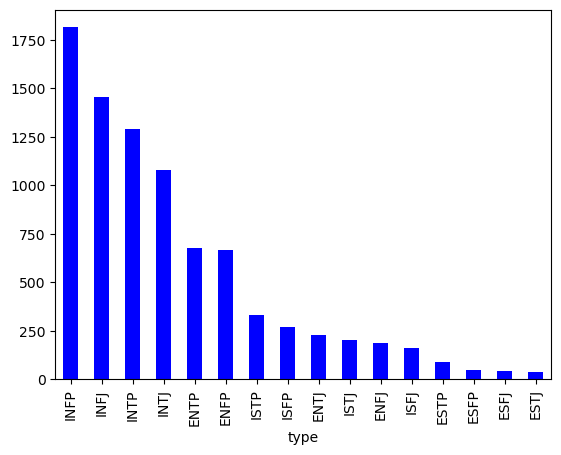

In [21]:
personality_data["type"].value_counts().plot(kind="bar", color="blue")
plt.show()

### to handle the class imbalance better, converting the 16 classes into 4 more balanced classes


In [22]:
personality_data["is_Extrovert"] = personality_data["type"].apply(
    lambda x: 1 if x[0] == "E" else 0
)
personality_data["is_Sensing"] = personality_data["type"].apply(
    lambda x: 1 if x[1] == "S" else 0
)
personality_data["is_Thinking"] = personality_data["type"].apply(
    lambda x: 1 if x[2] == "T" else 0
)
personality_data["is_Judging"] = personality_data["type"].apply(
    lambda x: 1 if x[3] == "J" else 0
)
personality_data = personality_data[
    ["type", "is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging", "posts"]
]
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...
1,INFJ,0,0,0,1,'I love both and they are equally important to...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...


### checking individual counts

In [24]:
introvert_count = personality_data["is_Extrovert"].value_counts()[0]
extrovert_count = personality_data["is_Extrovert"].value_counts()[1]

intuition_count = personality_data["is_Sensing"].value_counts()[0]
sensing_count = personality_data["is_Sensing"].value_counts()[1]

feeling_count = personality_data["is_Thinking"].value_counts()[0]
thinking_count = personality_data["is_Thinking"].value_counts()[1]

perceiving_count = personality_data["is_Judging"].value_counts()[0]
judging_count = personality_data["is_Judging"].value_counts()[1]

In [25]:
print(f"Introvert Count: {introvert_count}")
print(f"Extrovert Count: {extrovert_count}")
print(f"Intuition Count: {intuition_count}")
print(f"Sensing Count: {sensing_count}")
print(f"Feeling Count: {feeling_count}")
print(f"Thinking Count: {thinking_count}")
print(f"Perceiving Count: {perceiving_count}")
print(f"Judging Count: {judging_count}")

Introvert Count: 6609
Extrovert Count: 1979
Intuition Count: 7403
Sensing Count: 1185
Feeling Count: 4646
Thinking Count: 3942
Perceiving Count: 5188
Judging Count: 3400


D:\SOFTWARES\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\SOFTWARES\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\SOFTWARES\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\SOFTWARES\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vecto

AttributeError: 'numpy.int64' object has no attribute 'startswith'

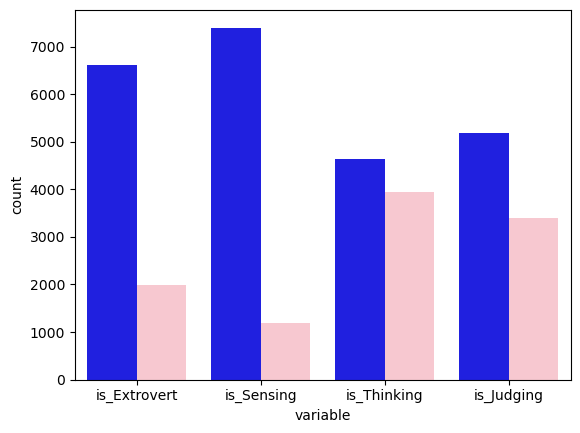

In [26]:
sns.countplot(
    x="variable",
    hue="value",
    data=pd.melt(
        personality_data[["is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging"]]
    ),
    palette=["blue", "pink"],
)

plt.show()

## Feature Engineering

In [31]:
personality_data["clean_posts"] = personality_data["posts"].str.lower()

# Replace ||| with space
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    r"\|\|\|", " "
)

# Remove URLs
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*", ""
)

# Remove emails
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    r"\S+@\S+", ""
)

# Remove punctuations
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    r"[^a-z\s]", " "
)

# Drop MBTIs mentioned in the posts
mbti = personality_data["type"].unique()
for type_word in mbti:
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        type_word.lower(), ""
    )

# Print the first few rows to check the cleaned posts
print(personality_data["clean_posts"].head())


0    'when asked of the things you wish you did ear...
1    'i love both and they are equally important to...
2    really? you think implying that everyone who i...
3    'love is a crazy thing.   se is our best form ...
4    'i am a physics undergrad with a computation e...
Name: clean_posts, dtype: object


In [32]:
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,'when asked of the things you wish you did ear...
1,INFJ,0,0,0,1,'I love both and they are equally important to...,'i love both and they are equally important to...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really? you think implying that everyone who i...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,'love is a crazy thing. se is our best form ...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,'i am a physics undergrad with a computation e...


## Lemmitization

In [34]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

In [35]:
t = time.time()

lemmatizer = WordNetLemmatizer()

personality_data["clean_posts"] = personality_data["clean_posts"].apply(
    lambda x: " ".join(
        [
            lemmatizer.lemmatize(word)
            for word in x.split(" ")
            if word not in stopwords.words("english")
        ]
    )
)
print(f"Lemmitizing Time: {time.time() - t} seconds")

Lemmitizing Time: 1600.9186594486237 seconds


In [37]:
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\b\w{1,2}\b"), "", regex=True
)

In [38]:
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,"'when asked thing wish earlier (' ), find answ..."
1,INFJ,0,0,0,1,'I love both and they are equally important to...,' love equally important . music window soul. ...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really? think implying everyone entrepreneur s...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,"'love crazy thing. best form communication,..."
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,"' physic undergrad computation emphasis, /will..."


In [39]:
personality_data.shape

(8588, 7)

In [42]:
personality_data.to_csv(("clean_data_1.csv"), index=False)